# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [776]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [777]:
df = pd.read_csv('Traffic Data.csv', parse_dates=['date_time'])
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [779]:
df.shape

(20000, 8)

In [780]:
df.dtypes

traffic_volume                float64
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
dtype: object

<Axes: title={'center': 'traffic_volume'}>

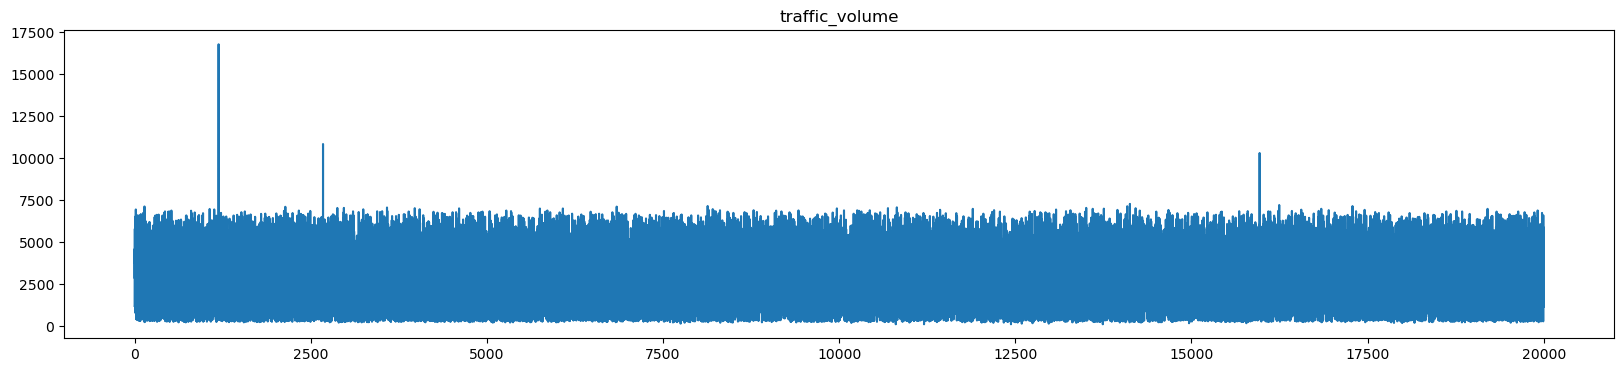

In [781]:
# Plot the time series data
df['traffic_volume'].plot(kind='line', figsize=(20, 4), title='traffic_volume')

<Axes: title={'center': 'traffic_volume'}>

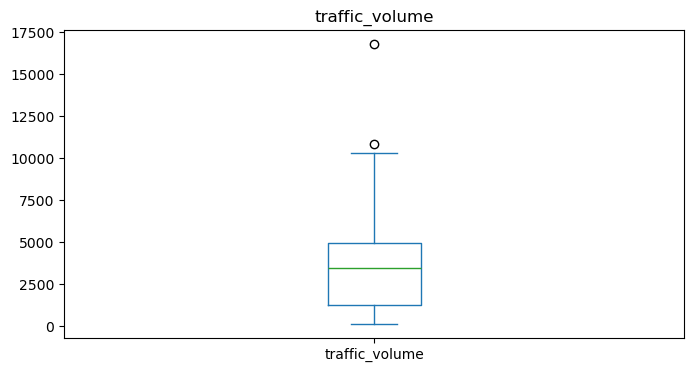

In [782]:
df['traffic_volume'].plot(kind='box', figsize=(8, 4), title='traffic_volume')

In [783]:
# check for the null values
df.isnull().sum()

traffic_volume         20
temp                    0
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
date_time               0
dtype: int64

In [784]:
df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)

In [785]:
df.isnull().sum()

traffic_volume         0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

<Figure size 2000x600 with 0 Axes>

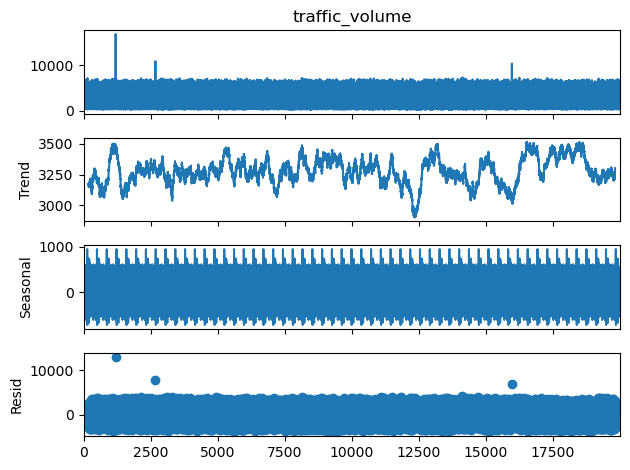

In [786]:
# Perform seasonal decomposition
result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)

plt.figure(figsize=(20, 6))
result.plot()
plt.show()

<Axes: xlabel='traffic_volume', ylabel='temp'>

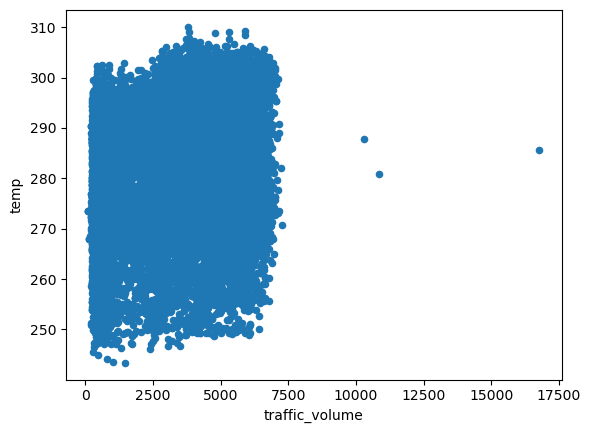

In [787]:
df.plot(kind='scatter', x='traffic_volume', y='temp')

<Axes: title={'center': 'traffic_volume'}, ylabel='Frequency'>

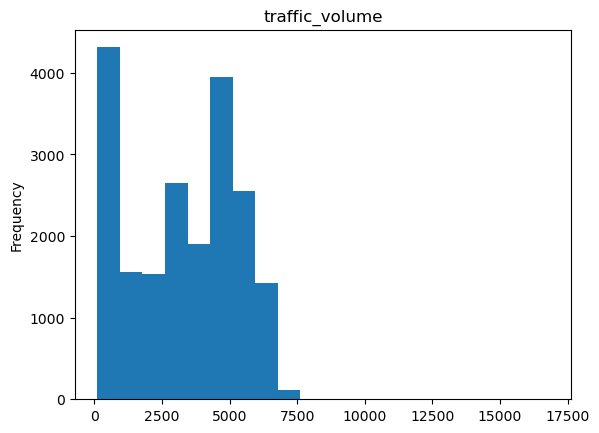

In [788]:
df['traffic_volume'].plot(kind='hist', bins=20, title='traffic_volume')

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [790]:
# check for missing values 
df.isna().sum()

traffic_volume         0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

In [791]:
# # resample the data to ensure consistent time intervals.
# df = df.resample('D').mean()

# # Preview the result
# df.head()

In [792]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [793]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.set_index('date_time')
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [795]:
# add some new columns, features
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume
date_time,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,NaN
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0


In [796]:
# Add time-based features

df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Day_of_Year'] = df.index.dayofyear

df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,Day_of_Week,Month,Day_of_Year
date_time,,,,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,NaN,6,8,239
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0,3,9,249
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0,4,8,237
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0,3,11,313
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0,3,11,313


In [797]:
df.shape

(20000, 11)

In [798]:
# there is NaN value so i want to replace it 
df = df.fillna(0)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [800]:
label = LabelEncoder()
df['weather_main'] = label.fit_transform(df['weather_main'])
df['weather_description'] = label.fit_transform(df['weather_description'])

In [801]:
df.values

array([[1.2090e+03, 2.9115e+02, 0.0000e+00, ..., 6.0000e+00, 8.0000e+00,
        2.3900e+02],
       [1.2480e+03, 2.8601e+02, 0.0000e+00, ..., 3.0000e+00, 9.0000e+00,
        2.4900e+02],
       [4.6020e+03, 2.9369e+02, 0.0000e+00, ..., 4.0000e+00, 8.0000e+00,
        2.3700e+02],
       ...,
       [1.1320e+03, 2.7530e+02, 0.0000e+00, ..., 2.0000e+00, 3.0000e+00,
        8.7000e+01],
       [5.5250e+03, 2.6094e+02, 0.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        4.3000e+01],
       [5.0420e+03, 3.0165e+02, 0.0000e+00, ..., 3.0000e+00, 5.0000e+00,
        1.5100e+02]])

In [802]:
train_split = round(len(df) * 0.8)
train_data = df.iloc[:train_split]
test_data = df.iloc[train_split:]

In [803]:
train_data.shape, test_data.shape

((16000, 11), (4000, 11))

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [805]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [806]:
train_data_scaled.shape, test_data_scaled.shape

((16000, 11), (4000, 11))

In [807]:
# Prepare the data 
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0:dataset.shape[1]]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [808]:
X_train, Y_train = create_dataset(train_data_scaled, 10)
X_test, Y_test = create_dataset(test_data_scaled, 10)

In [809]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((15989, 10, 11), (15989,), (3989, 10, 11), (3989,))

In [810]:
X_train

array([[[0.06575474, 0.72473445, 0.        , ..., 1.        ,
         0.63636364, 0.65205479],
        [0.06809455, 0.64673748, 0.        , ..., 0.5       ,
         0.72727273, 0.67945205],
        [0.26931845, 0.76327769, 0.        , ..., 0.66666667,
         0.63636364, 0.64657534],
        ...,
        [0.33195344, 0.8522003 , 0.        , ..., 0.66666667,
         0.63636364, 0.58630137],
        [0.15172786, 0.48406677, 0.        , ..., 0.33333333,
         0.        , 0.02465753],
        [0.0412767 , 0.80485584, 0.        , ..., 0.5       ,
         0.63636364, 0.60273973]],

       [[0.06809455, 0.64673748, 0.        , ..., 0.5       ,
         0.72727273, 0.67945205],
        [0.26931845, 0.76327769, 0.        , ..., 0.66666667,
         0.63636364, 0.64657534],
        [0.16348692, 0.28770865, 0.        , ..., 0.5       ,
         0.90909091, 0.85479452],
        ...,
        [0.15172786, 0.48406677, 0.        , ..., 0.33333333,
         0.        , 0.02465753],
        [0.0

In [811]:
X_test

array([[[0.20338373, 0.72367223, 0.07169811, ..., 0.83333333,
         0.63636364, 0.64657534],
        [0.26085913, 0.60333839, 0.        , ..., 1.        ,
         0.36363636, 0.38356164],
        [0.30825534, 0.6538695 , 0.        , ..., 0.5       ,
         0.36363636, 0.39452055],
        ...,
        [0.15442765, 0.3616085 , 0.        , ..., 0.66666667,
         0.27272727, 0.26027397],
        [0.28569714, 0.27647951, 0.        , ..., 0.66666667,
         1.        , 0.95890411],
        [0.20182385, 0.75417299, 0.        , ..., 0.83333333,
         0.72727273, 0.70684932]],

       [[0.26085913, 0.60333839, 0.        , ..., 1.        ,
         0.36363636, 0.38356164],
        [0.30825534, 0.6538695 , 0.        , ..., 0.5       ,
         0.36363636, 0.39452055],
        [0.22582193, 0.83960546, 0.        , ..., 1.        ,
         0.72727273, 0.69041096],
        ...,
        [0.28569714, 0.27647951, 0.        , ..., 0.66666667,
         1.        , 0.95890411],
        [0.2

In [812]:
Y_train

array([0.17920566, 0.23098152, 0.17506599, ..., 0.34815215, 0.19162467,
       0.27063835])

In [813]:
Y_test

array([0.2237821 , 0.3411927 , 0.18022558, ..., 0.34689225, 0.06113511,
       0.32469402])

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [819]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(10, 11)))
model.add(LSTM(64))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [821]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 10, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,545 (205.25 KB)

 Trainable params: 52,545 (205.25 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [824]:
# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0149 - val_loss: 0.0143
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - val_loss: 0.0139
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - val_loss: 0.0139
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - val_loss: 0.0139
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0141 - val_loss: 0.0139
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - val_loss: 0.0141
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0143 - val_loss: 0.0141
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0142 - val_loss: 0.0141
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [826]:
y_pred_1 = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [828]:
y_pred_1.shape

(3989, 1)

In [830]:
y_pred_1

array([[0.19296952],
       [0.19556615],
       [0.19653839],
       ...,
       [0.19660598],
       [0.19763698],
       [0.19592744]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [833]:
# Calculate MSE 
mse = mean_squared_error(Y_test, y_pred_1)

print(f"MSE: {mse:.4f}")

MSE: 0.0139


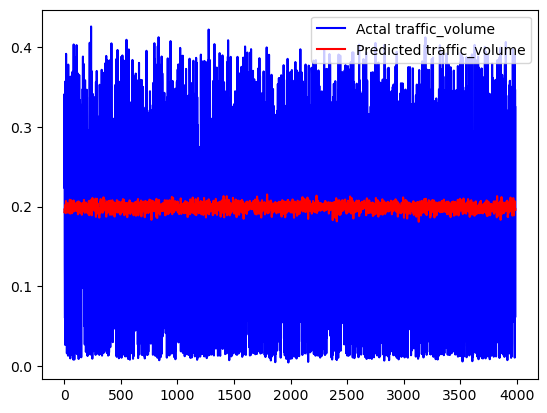

In [835]:
plt.plot(Y_test, color='blue',label='Actal traffic_volume')
plt.plot(y_pred_1, color='red',label='Predicted traffic_volume')
plt.legend()
plt.show()

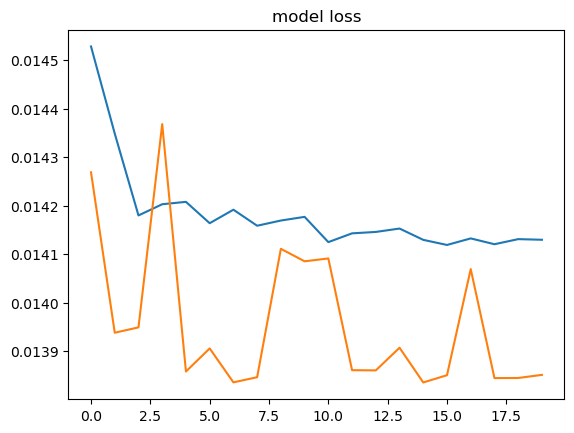

In [837]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')

plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [839]:
# Build the GRU model
model2 = Sequential()
model2.add(GRU(units=50, return_sequences=True, input_shape=(10, 11)))
model2.add(GRU(units=50))
model2.add(Dropout(0.2))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [841]:
model2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 10, 50)         │         9,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,801 (96.88 KB)

 Trainable params: 24,801 (96.88 KB)

 Non-trainable params: 0 (0.00 B)

In [843]:
history = model2.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0189 - val_loss: 0.0143
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0148 - val_loss: 0.0139
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0146 - val_loss: 0.0139
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0145 - val_loss: 0.0139
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144 - val_loss: 0.0139
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144 - val_loss: 0.0138
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0144 - val_loss: 0.0139
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0142 - val_loss: 0.0138
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [844]:
y_pred_2 = model2.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [845]:
y_pred_2.shape

(3989, 1)

In [846]:
y_pred_2

array([[0.19044104],
       [0.19120938],
       [0.19251339],
       ...,
       [0.18677635],
       [0.19010925],
       [0.18728152]], dtype=float32)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [847]:
# Calculate MSE
mse = mean_squared_error(Y_test, y_pred_2)

print(f"MSE: {mse:.4f}")

MSE: 0.0138


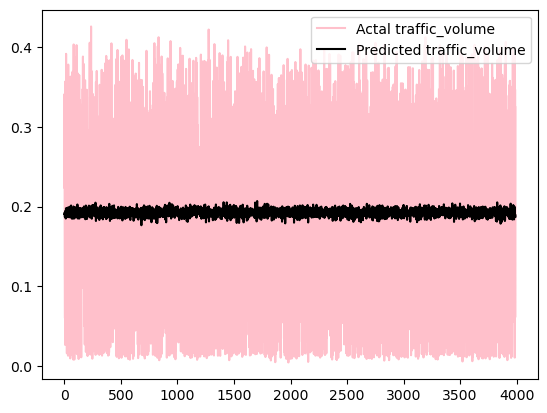

In [848]:
plt.plot(Y_test, color='pink',label='Actal traffic_volume')
plt.plot(y_pred_2, color='black',label='Predicted traffic_volume')
plt.legend()
plt.show()

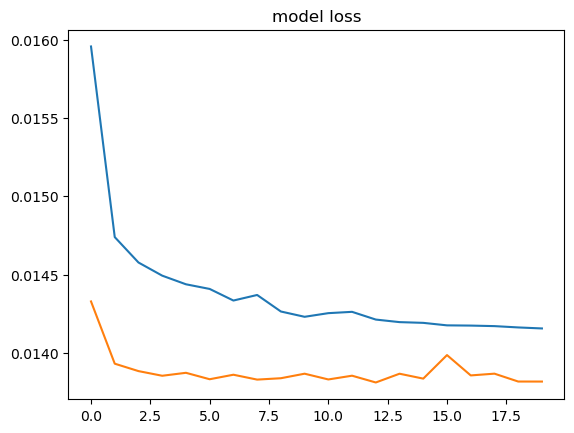

In [849]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')

plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1- I check for handling missing values and NaN also before traning the model, when i just handling missing values without work on NaN value the loss when i traning the model is become NaN also so i back again and handel the NaN value also.

2- Yes, i do feature engineering on the date_time columns i extract three more features from day of the week and months day of the year.

3- In both model LSTM and GRU i work with simple model as frist step to see the result and step by step add more layer based on result that i have.

4- The optimizer is the default adam, for the epochs i try first 10 for both models and then 20 epochs and that give butter result and less number of loss, the batch_size  was 64.

5- The loss and evaluation metrics i use mean_squared_error for both to see the model performance.

6- I think the model need more improvements since the loss plot does not prefect that much so we can check on the Overfitting and Underfitting or check for the balance of the dataset or increase the model complexity to capture the general patterns and can butter forecasting.